<a href="https://colab.research.google.com/github/andresgabas/DS2-Coderhouse/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
url = 'https://raw.githubusercontent.com/andresgabas/DS2-Coderhouse/main/ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(url)



Se trabajará con una base de datos descargada del sitio https://archive.ics.uci.edu/.

Esta base de datos recopila información de obesidad en Mexico, Perú y Colombia haciendo foco en los hábitos alimenticios y en la condición física.
Se tuvieron en cuenta las siguientes características para este estudio:

Gender (genero): Masculino o femenino.

Age (edad): Edad de la persona en años.

Height (altura): Altura de la persona en metros.

Weight (peso): Peso de la persona en kg.

Family_history_with_overweight (antecedentes_familiares): antecedentes de obesidad en la familia, si o no.     

FAVC (calorica): comen comida calórica frecuentemente.

FCVC (vegetales): incluyen vegetales en su dieta?

NCP (comidas_principales): Catidad de comidas principales

CAEC (come_entre_comidas):

Smoke (fumador): Si o no.

CH2O (consumo_de_agua): Consumo de agua diario, menos de 1 litros, más de un litro, más de 2 litros

SCC (control_calorias): Control de calorías diario, si o no.

FAF (actividad_fisica) Actividad física, días por semana.

TUE (actividades_sedentarias): cantidad de horas 0 a 2, 3-5, más de 5

CALC (consumo_alcohol): Consume alcohol, no, a veces, frecuentemente o siempre.

MTRANS (medio_de_transporte): Medio de transporte utilizado Auto, moto, bicicleta, transporte público o caminar.  

Nivel de Obesidad (nivel_obesidad): Según peso: peso insuficiente, normal, sobrepeso 1 y 2, obesidad tipo 1, 2 y 3.

Objetivos:

*   Se buscarán las variables permitan generar un modelos de clasificación que ayuden a clasificar a los diferentes pacientes según su peso.

*   Se crearán modelos de Machine Learning de aprendizaje supervisado y no supervisado.

*   Se buscarán las variables que permitan definir un modelo de machine learning de regresión que permita en base a esas características, determinar si un paciente sufre de obesidad o ubicar en que área de peso se encuentra de las
categorías descriptas en la variable nivel_obesidad.

Hipótesis a comprobar:

*   Las personas que más actividad física hacen tienen peso normal.
*   Las personas que comen más vegetales suelen tener peso normal.
*   Las personas que más comidas principales comen son obesas.
*   Las personas que utilizan la bicicleta o caminand como medio de transporte tienen peso normal.

   








In [3]:
data.columns = ['genero','edad','altura','peso','antecedentes','calorica','vegetales','comidas_principales','come_entre_comidas','fumador','consumo_agua','consumo_calorias','actividad_fisica','actividad_sedentaria','consumo_alcohol','medio_de_transporte','nivel_obesidad']

In [4]:
data.describe()

,edad,altura,peso,vegetales,comidas_principales,consumo_agua,actividad_fisica,actividad_sedentaria
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Text(0.5, 1.0, 'Porcentaje de hombres y mujeres')

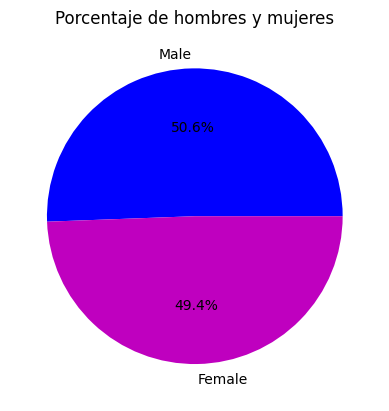

In [5]:
genero_count = data['genero'].value_counts()
plt.pie(genero_count, labels=genero_count.index, autopct='%1.1f%%', colors= ['b','m'])
plt.title('Porcentaje de hombres y mujeres')

In [59]:
solo_obesidad = data[data['nivel_obesidad'].isin(['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])]

Text(0.5, 1.0, 'Porcentaje según tipo de obesidad')

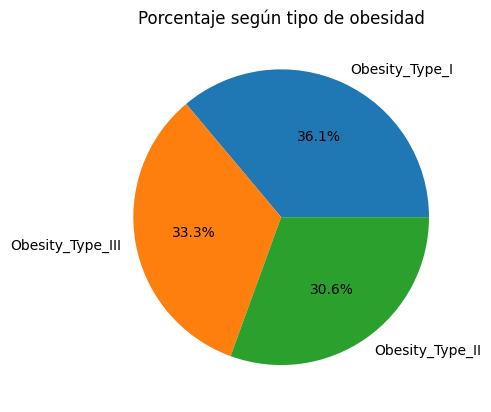

In [60]:
obesidad = solo_obesidad['nivel_obesidad'].value_counts()
plt.pie(obesidad, labels=obesidad.index, autopct='%1.1f%%')
plt.title('Porcentaje según tipo de obesidad')

<Axes: xlabel='nivel_obesidad', ylabel='Count'>

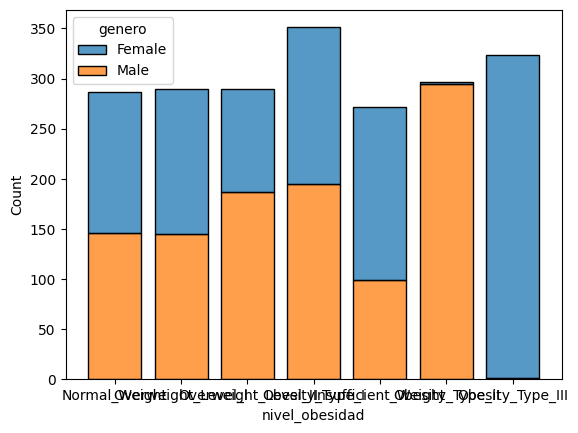

In [6]:
sns.histplot(data=data, x='nivel_obesidad', multiple="stack", shrink=.8, hue='genero', label = False)

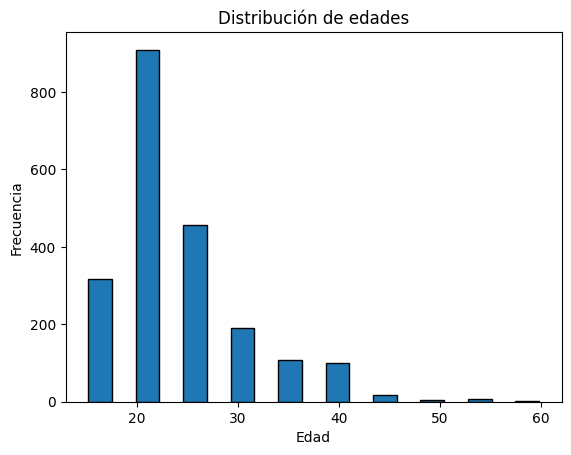

In [7]:
plt.hist(data['edad'], edgecolor='black', label=any,rwidth=0.5)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de edades')
plt.show()

A partir del gráfico de distribución se observa que la mayoría de los encuestados están entre los 20 y los 30 años con la mayoría cerca de los 20 años.

In [8]:
# prompt: how to use groupby function

# Group the data by 'genero' and calculate the mean age for each gender.
grouped_data = data.groupby('genero')['edad'].mean()
print(grouped_data)

# You can also group by multiple columns.
# For example, group by 'genero' and 'nivel_obesidad' and calculate the average weight.
grouped_data_2 = data.groupby(['genero', 'nivel_obesidad'])['peso'].mean()
print(grouped_data_2)


genero
Female    24.001907
Male      24.616020
Name: edad, dtype: float64
genero  nivel_obesidad     
Female  Insufficient_Weight     46.687502
        Normal_Weight           56.417730
        Obesity_Type_I          82.293181
        Obesity_Type_II         96.750000
        Obesity_Type_III       120.779941
        Overweight_Level_I      69.579014
        Overweight_Level_II     74.537996
Male    Insufficient_Weight     55.531151
        Normal_Weight           67.695890
        Obesity_Type_I         101.331813
        Obesity_Type_II        115.431110
        Obesity_Type_III       173.000000
        Overweight_Level_I      78.954641
        Overweight_Level_II     86.242326
Name: peso, dtype: float64


In [9]:
obesidad_group = data.groupby('nivel_obesidad')['Obesity_Type_I']['Obesity_Type_II']['Obesity_Type_III'].count()
obesity_group.describe()

KeyError: 'Column not found: Obesity_Type_I'

<Axes: xlabel='edad', ylabel='peso'>

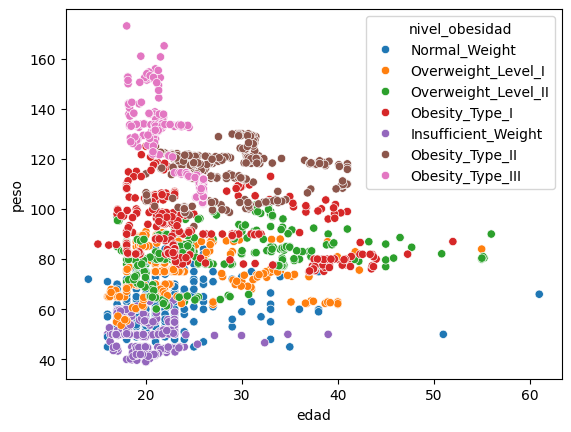

In [14]:
sns.scatterplot(data=data, x="edad", y="peso", hue='nivel_obesidad')

In [ ]:
# prompt: count a subcategory of a series

# Assuming 'nivel_obesidad' is the series you want to count subcategories for
# Replace 'subcategory_value' with the specific value you want to count
count_subcategory = data['nivel_obesidad'].value_counts()['subcategory_value']
print(count_subcategory)


<Axes: xlabel='edad', ylabel='altura'>

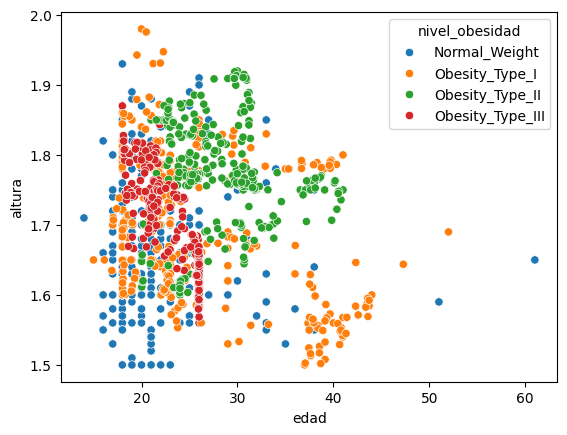

In [22]:
solo_obesidad = data[data['nivel_obesidad'].isin(['Normal_Weight','Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])]
sns.scatterplot(data=solo_obesidad, x="edad", y="altura", hue='nivel_obesidad')

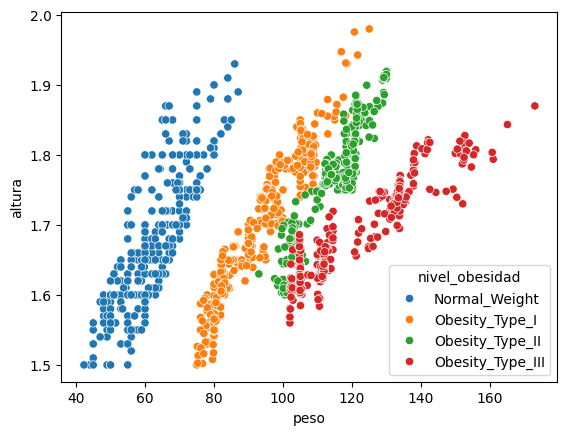

In [16]:
# prompt: Create scatterplot of peso y altura with hue using feature nivel_obesidad and only the variants Obesity_Type_I,Obesity_Type_II y Obesity_Type_III

# Filter the data to include only the specified variants
solo_obesidad = data[data['nivel_obesidad'].isin(['Normal_Weight','Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])]

# Create the scatterplot
sns.scatterplot(data=solo_obesidad, x="peso", y="altura", hue='nivel_obesidad')
plt.show()


<Axes: xlabel='peso', ylabel='edad'>

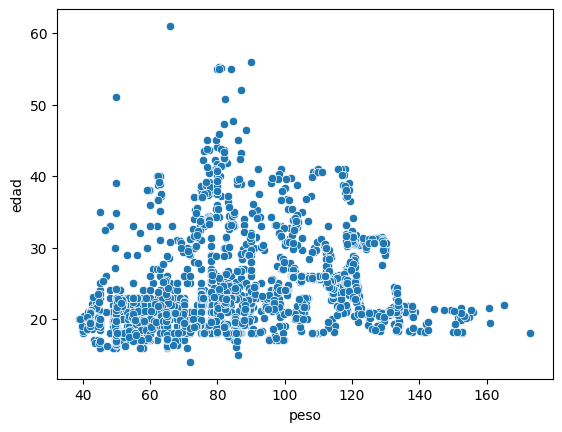

In [12]:
sns.scatterplot(data=data, x="peso", y="edad")

<Axes: xlabel='calorica', ylabel='Count'>

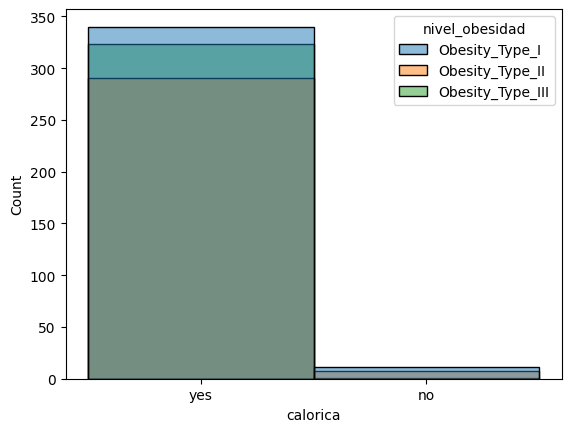

In [44]:
solo_obesidad = data[data['nivel_obesidad'].isin(['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])]
sns.histplot(data=solo_obesidad, x="calorica", hue='nivel_obesidad')

In [49]:
solo_obesidad = data[data['nivel_obesidad'].isin(['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])]
sns.distplot(solo_obesidad, x="vegetales", hue='solo_obesidad')

TypeError: distplot() got an unexpected keyword argument 'hue'

En este gráfico se observa la cantidad de vegetales que comsumen los participantes. Uno esperaría ver que las personas la cantidad vegetales consumidos se esperar'ia ver que no haya obesidad, sin embargo es al revés, dado que no tengo un detalle de que vegetales son o que tipo de  